In [65]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression, LogisticRegressionCV






# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [5]:
# Load the Iris dataset included with scikit-learn

# Load the Iris dataset included with scikit-learn
#Your code here.
iris = load_iris()
iris.keys()
iris_df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width',	'petal length', 'petal width'])
target_names = iris.target_names
target_df = pd.DataFrame(iris.target, columns=['target'])
target_df['class'] = target_df.replace({0:target_names[0], 1:target_names[1], 2:target_names[2]})
df_iris = iris_df.join(target_df)



In [6]:
# Put data in a pandas DataFrame

In [7]:
# Add target and class to DataFrame

In [8]:
# Show 10 random samples

In [9]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
lda = LinearDiscriminantAnalysis()


In [47]:
# same process as always, identify your X's and your y's

# YOUR CODE HERE

X = df_iris.drop(['target','class'], axis='columns').values
y = df_iris['target'].values

In [48]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [68]:
steps = [('scaler', StandardScaler()), ('lda', LinearDiscriminantAnalysis()), ('model', LinearRegression())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis()),
                ('model', LinearRegression())])

In [69]:
pipe.score(X_test, y_test)

0.9468960016420045

In [70]:
# Scale the X's
pipe[1].scalings_

array([[ 0.60944898,  0.17263847],
       [ 0.81904224, -1.01691036],
       [-4.04381427,  1.17232674],
       [-1.90837979, -1.91084525]])

In [34]:
# apply the lda transformation
#X_train_lda = lda.fit_transform(X_train_norm, y_train)
#X_test_lda = lda.transform(X_test_norm)

In [35]:
#lda.predict(X_test)

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1])

In [36]:
# select 2 principal components
lda.scalings_

array([[ 0.60944898,  0.17263847],
       [ 0.81904224, -1.01691036],
       [-4.04381427,  1.17232674],
       [-1.90837979, -1.91084525]])

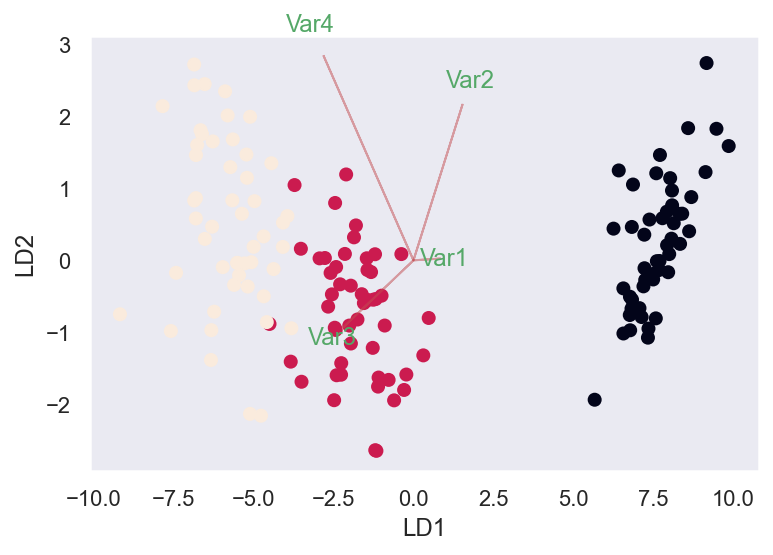

In [58]:
# take a look at the new axes for the data and plot them
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("LD{}".format(1))
plt.ylabel("LD{}".format(2))
plt.grid()

#Call the function. 
myplot(x_new, lda.scalings_) 
plt.show()

In [59]:
df = pd.DataFrame(np.column_stack((X_new, y)))

In [60]:
df

,0,1,2
0,8.061800,0.300421,0.0
1,7.128688,-0.786660,0.0
2,7.489828,-0.265384,0.0
3,6.813201,-0.670631,0.0
4,8.132309,0.514463,0.0
...,...,...,...
145,-5.645003,1.677717,2.0
146,-5.179565,-0.363475,2.0
147,-4.967741,0.821141,2.0
148,-5.886145,2.345091,2.0


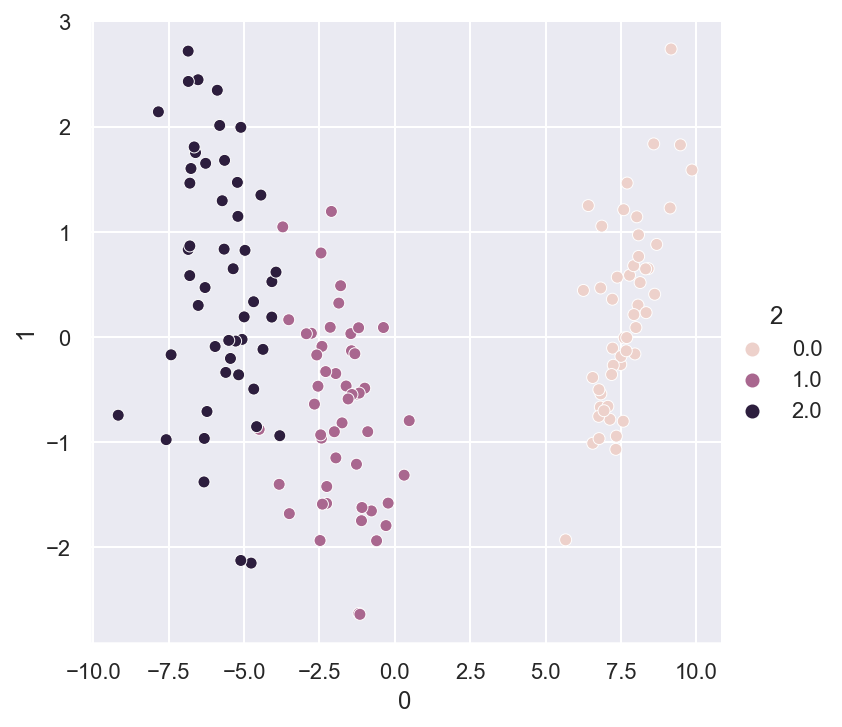

In [65]:
sns.relplot(kind='scatter', data=df, x=0, y=1, hue=2)

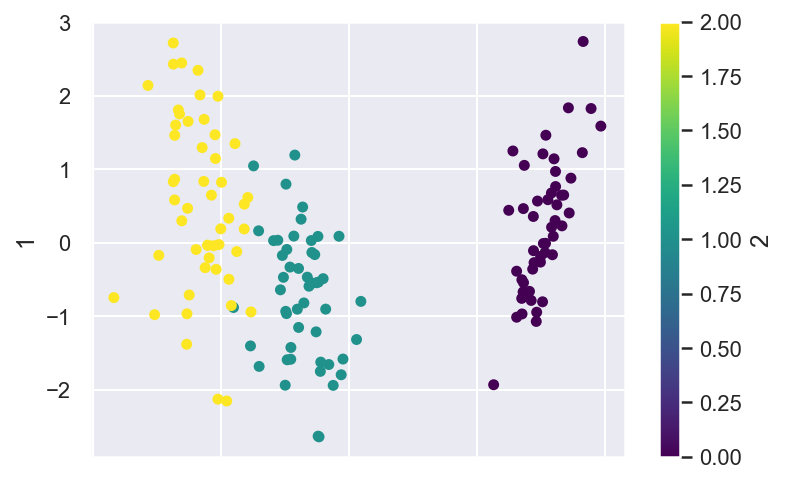

In [52]:
X_new = lda.fit_transform(X,y)
pd.DataFrame(np.column_stack((X_new, y))).plot.scatter(x=0, y=1, c=2, colormap='viridis');

In [ ]:
# what about the variability?

In [50]:
# Run a Random Forest Classifier with the transformed data

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)

In [2]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?

In [69]:
clf.score(X_train_lda, y_train)

0.9833333333333333